In [29]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Analysis") \
    .getOrCreate()

# Read all Data and Cache 

In [30]:
all_data = spark.read.parquet(f"/taxi/dataset.parquet")

In [31]:
import pyspark.sql.functions as f

In [32]:
all_data.cache()
all_data.count()

1660853098

In [33]:
all_data.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- trip_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)



### By Year

In [35]:
all_data.select("year").distinct().orderBy("year").show(20)

+----+
|year|
+----+
|2009|
|2010|
|2011|
|2012|
|2013|
|2014|
|2015|
|2016|
|2017|
|2018|
|2019|
|2020|
|2021|
|2022|
+----+



In [36]:
yearly_data = (
    all_data.groupBy("year").count().orderBy("year")
).toPandas()

<AxesSubplot:title={'center':'Rides per Year'}, xlabel='Year', ylabel='Rides'>

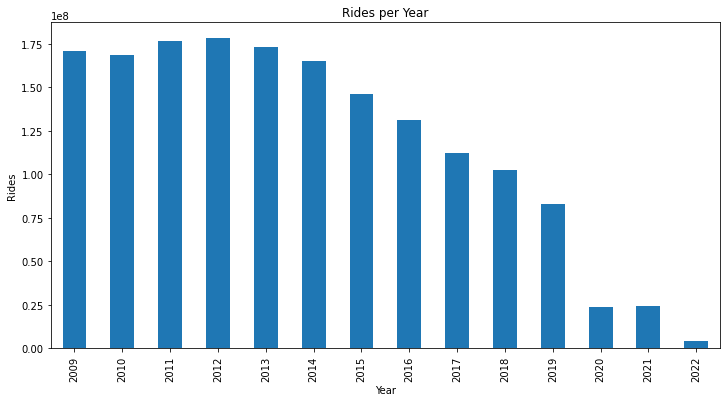

In [37]:
yearly_data.plot(
    x='year', y='count', figsize=(12, 6), 
    title='Rides per Year',
    legend=False,
    kind='bar',
    xlabel='Year',
    ylabel='Rides'
)

### Stopping Spark 

In [40]:
spark.stop()